In [2]:
import numpy as np
import scipy as sc
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from glob import glob

from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [3]:
p = plt.rcParams
p["scatter.marker"] = '.'
p["lines.markersize"] = 1


In [4]:
headers = []
datas = []
for run in glob('../data/grill/*'):
    header = np.loadtxt(run, delimiter='\t', skiprows=1, max_rows=1, unpack=True)
    p, d, G, A, f, I_chauffage, V_polarisation, V_grill = header
    headers.append(header)

    data = np.loadtxt(run, delimiter='\t', skiprows=2, unpack=True)
    V_in, V_out, *_ = data
    I_out = V_out / (10 * G)

    values, counts = np.unique_counts(V_in)
    V_in_combined = np.zeros_like(values)
    I_out_combined = np.zeros_like(values)
    I_out_std_combined = np.zeros_like(values)
    for i, (value, count) in enumerate(zip(values, counts)):
        idx = np.nonzero(V_in == value)
        V_in_combined[i] = value
        I_out_combined[i] = np.mean(I_out[idx])
        I_out_std_combined[i] = np.std(I_out[idx])

    datas.append((V_in_combined, I_out_combined, I_out_std_combined))

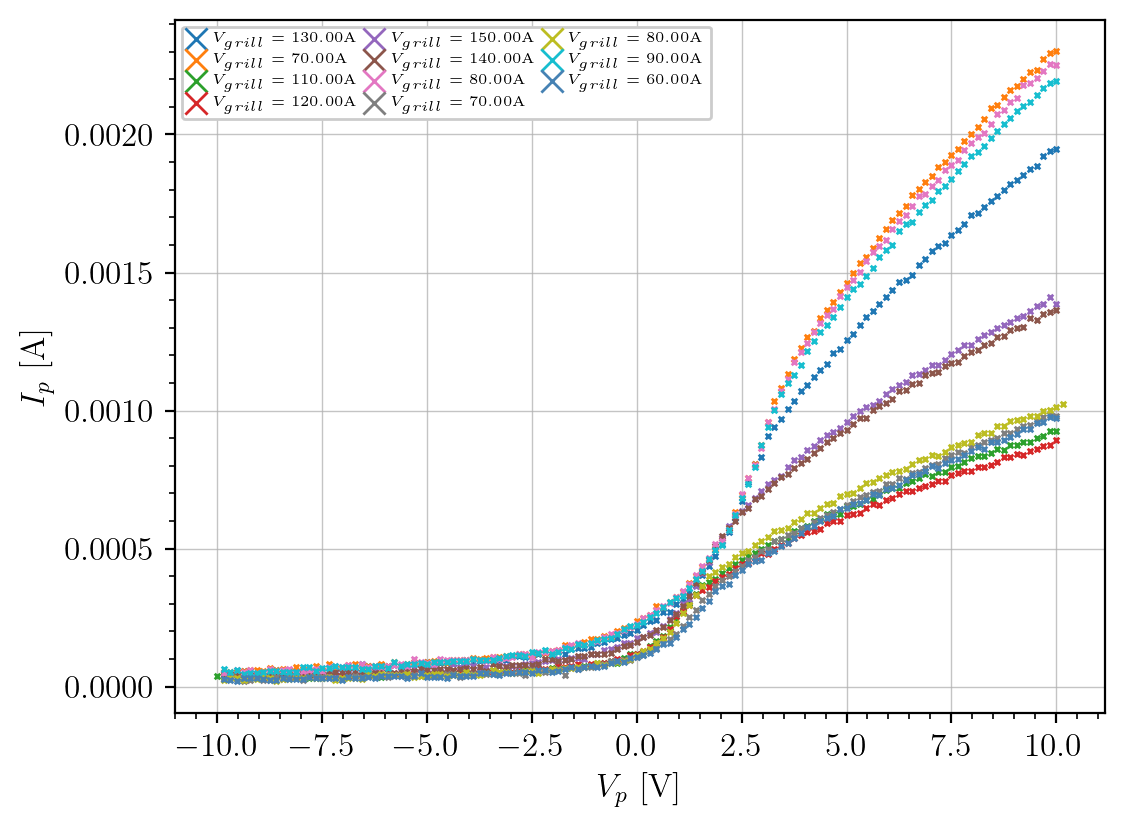

In [5]:
fig, ax = plt.subplots(1,1, dpi=200)
colors = list(plt.cm.tab10(np.arange(10))) + ["steelblue", "indigo", "darkgoldenrod", "seagreen", "orangered"]
ax.set_prop_cycle('color', colors)
plt.xlabel("$V_p$ [V]")
plt.ylabel("$I_p$ [A]")

for i, (header, data) in enumerate(zip(headers, datas)):
    if i < 7:
        continue
    p, d, G, A, f, I_chauffage, V_polarisation, V_grill = header
    V_in, I_out, I_out_std = data

    plt.scatter(V_in, (I_out), marker='|' if i < 7 else 'x', s=4, label=f"$V_{{grill}} = {V_grill:.2f}$A")
    idx = I_out < 0
    # plt.scatter(V_in[idx], I_out[idx])
    plt.legend(ncols=3, fontsize=5, markerscale=4, loc="upper left", columnspacing=0.5)

## Find V_{sp}, ln(I_{es})

In [6]:
def set_all_between(arr):
    idx = np.nonzero(arr)[0]
    idx_start, idx_stop = idx[0], idx[-1]
    arr[idx_start:idx_stop+1] = True
    return arr

3.89+/-0.11 0.001262+/-0.000027
T_e_run = (2.52±0.05)×10⁴, T_run = (2.17±0.04)×10⁰, n_e_run = (1.01±0.02)×10¹⁶


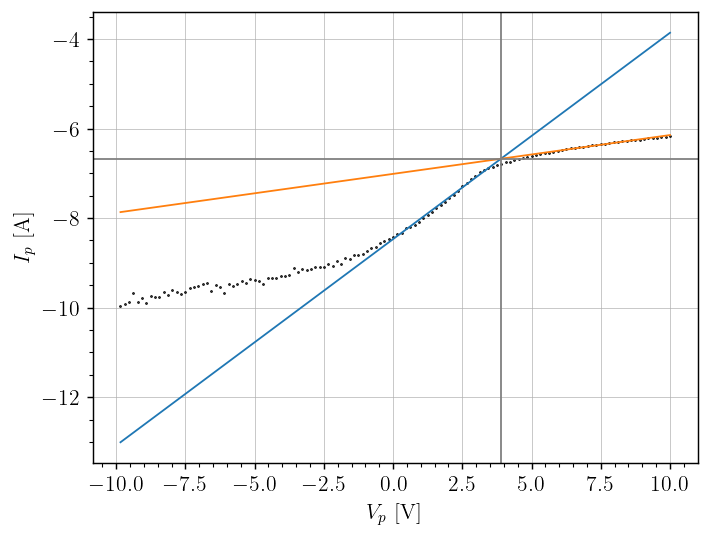

4.32+/-0.11 0.001444+/-0.000030
T_e_run = (2.73±0.05)×10⁴, T_run = (2.36±0.04)×10⁰, n_e_run = (1.11±0.02)×10¹⁶


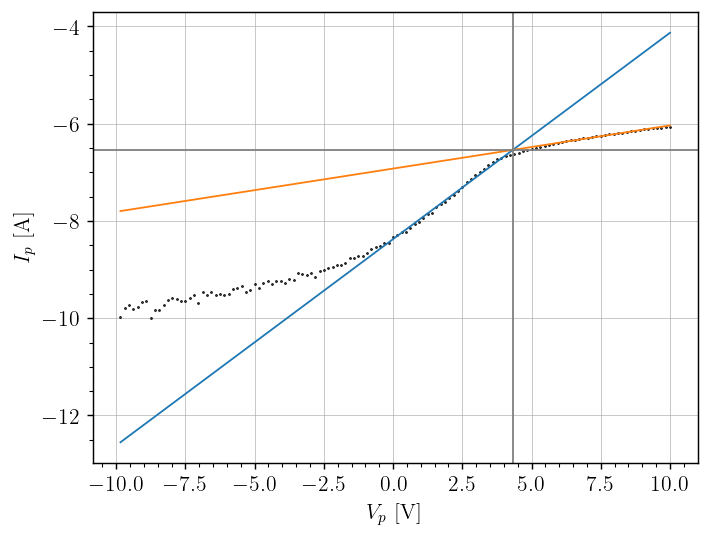

2.96+/-0.34 0.000604+/-0.000017
T_e_run = (2.6±0.2)×10⁴, T_run = (2.2±0.2)×10⁰, n_e_run = (4.8±0.1)×10¹⁵


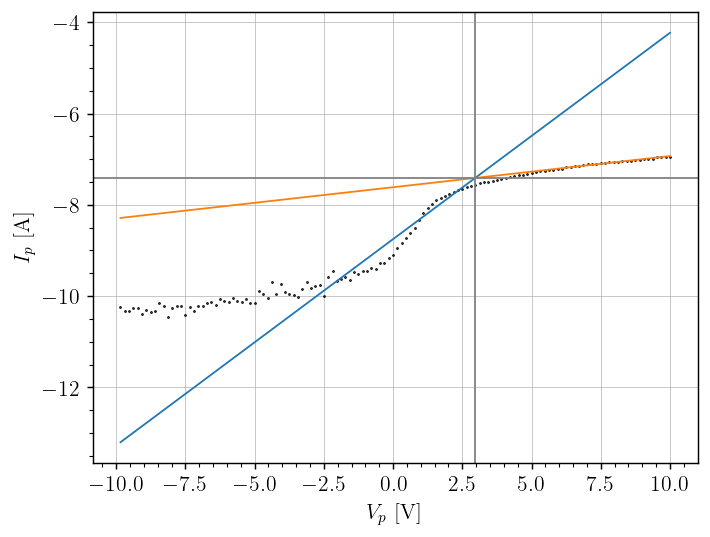

2.91+/-0.26 0.000611+/-0.000015
T_e_run = (2.4±0.2)×10⁴, T_run = (2.0±0.1)×10⁰, n_e_run = (5.1±0.1)×10¹⁵


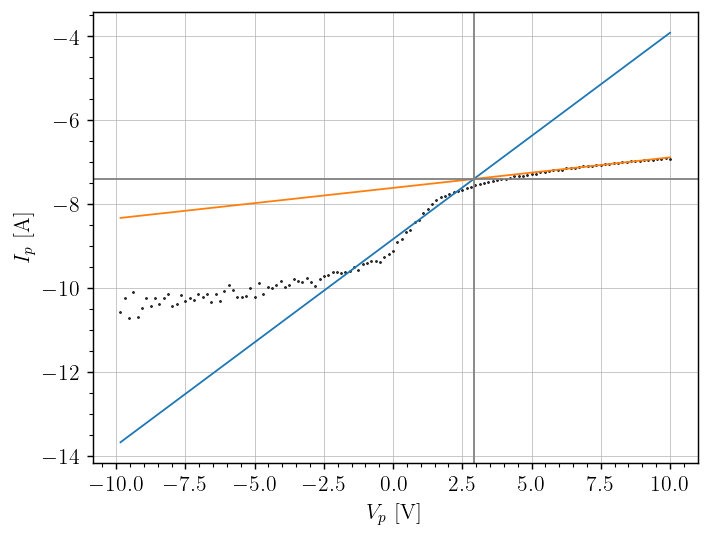

4.21+/-0.13 0.001329+/-0.000027
T_e_run = (2.71±0.06)×10⁴, T_run = (2.34±0.05)×10⁰, n_e_run = (1.03±0.02)×10¹⁶


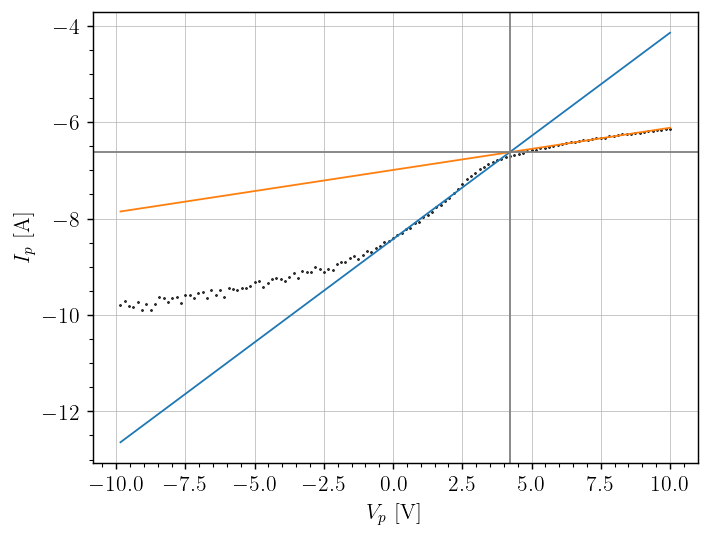

4.34+/-0.12 0.001459+/-0.000032
T_e_run = (2.74±0.05)×10⁴, T_run = (2.36±0.05)×10⁰, n_e_run = (1.12±0.02)×10¹⁶


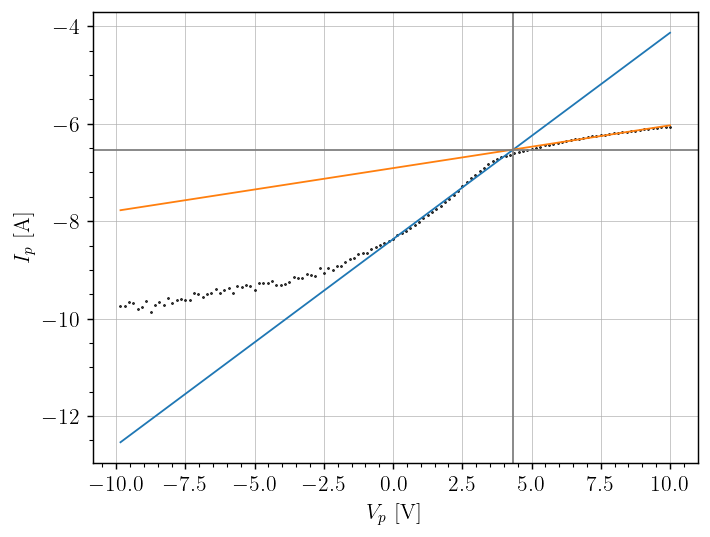

3.87+/-0.10 0.001233+/-0.000023
T_e_run = (2.54±0.04)×10⁴, T_run = (2.19±0.04)×10⁰, n_e_run = (9.9±0.2)×10¹⁵


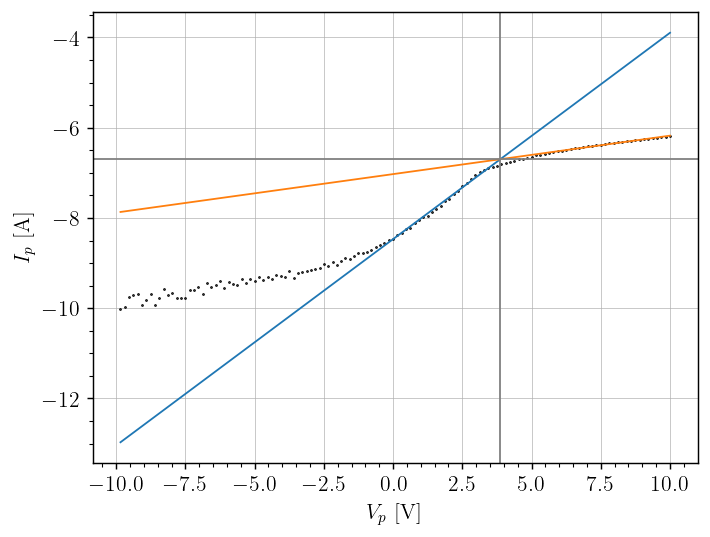

3.72+/-0.10 0.001171+/-0.000022
T_e_run = (2.43±0.05)×10⁴, T_run = (2.09±0.04)×10⁰, n_e_run = (9.6±0.2)×10¹⁵


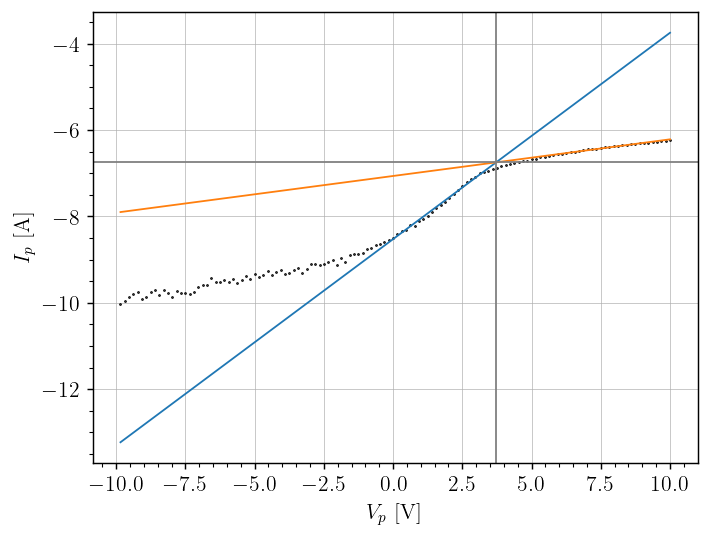

3.94+/-0.08 0.001393+/-0.000028
T_e_run = (2.37±0.03)×10⁴, T_run = (2.04±0.03)×10⁰, n_e_run = (1.16±0.02)×10¹⁶


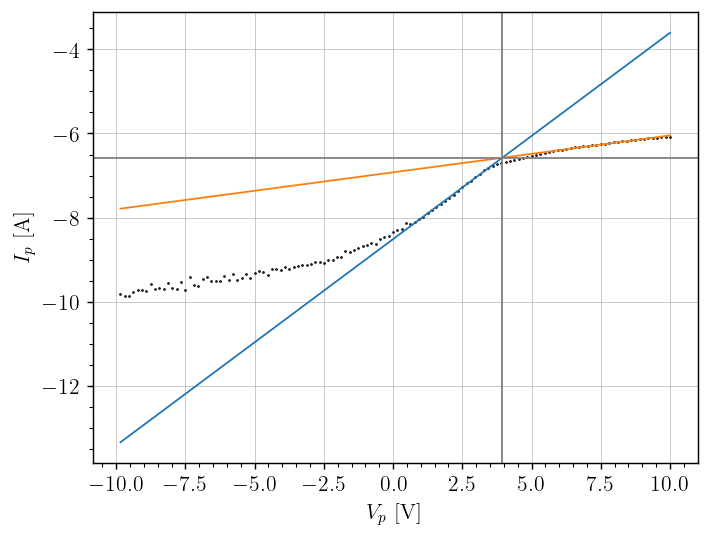

3.2+/-0.4 0.000589+/-0.000017
T_e_run = (3.2±0.3)×10⁴, T_run = (2.8±0.2)×10⁰, n_e_run = (4.2±0.1)×10¹⁵


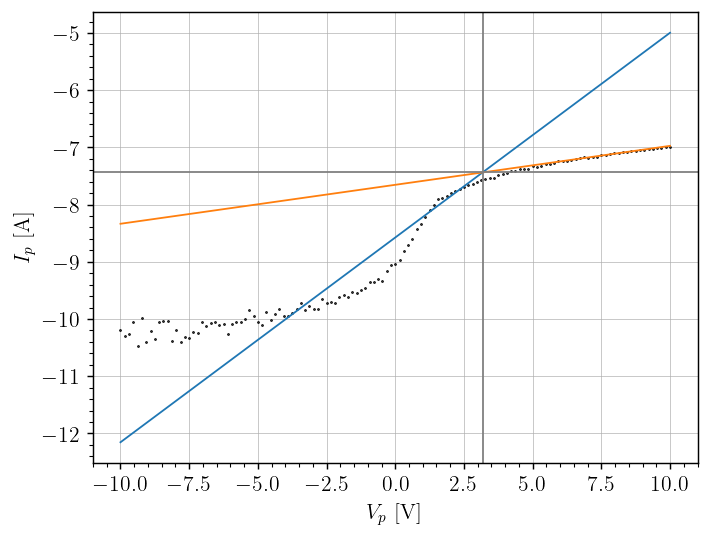

2.79+/-0.33 0.000549+/-0.000014
T_e_run = (2.6±0.2)×10⁴, T_run = (2.2±0.2)×10⁰, n_e_run = (4.4±0.1)×10¹⁵


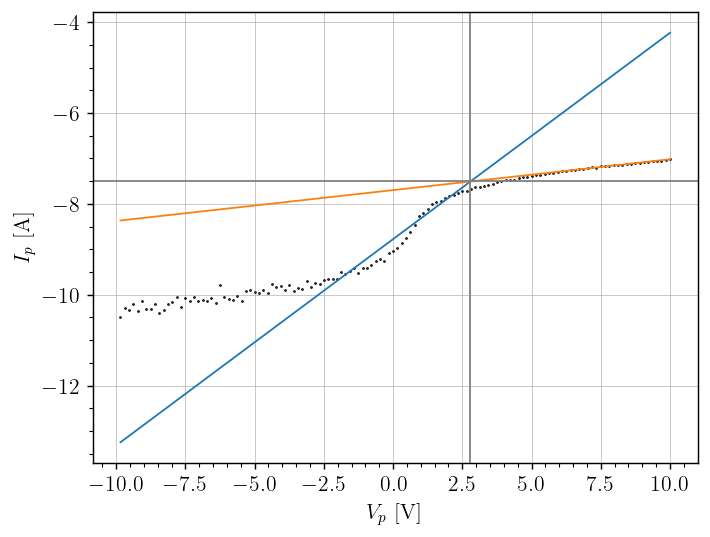

3.06+/-0.12 0.000852+/-0.000013
T_e_run = (2.19±0.06)×10⁴, T_run = (1.89±0.05)×10⁰, n_e_run = (7.3±0.1)×10¹⁵


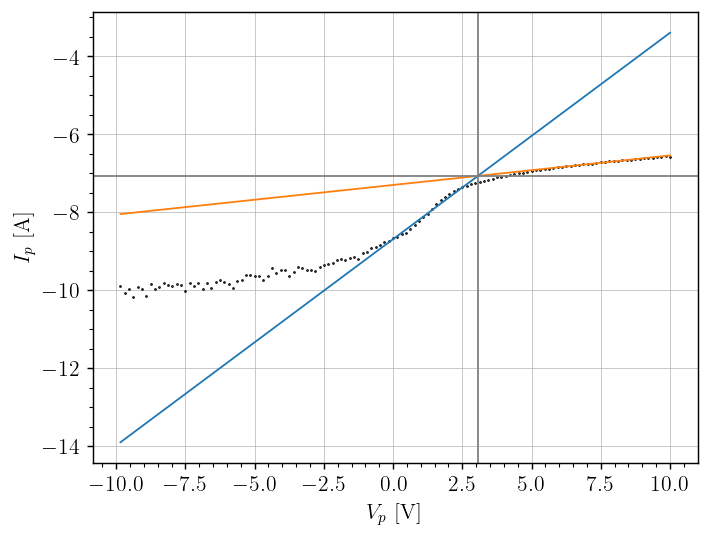

3.01+/-0.13 0.000833+/-0.000014
T_e_run = (2.16±0.07)×10⁴, T_run = (1.86±0.06)×10⁰, n_e_run = (7.2±0.1)×10¹⁵


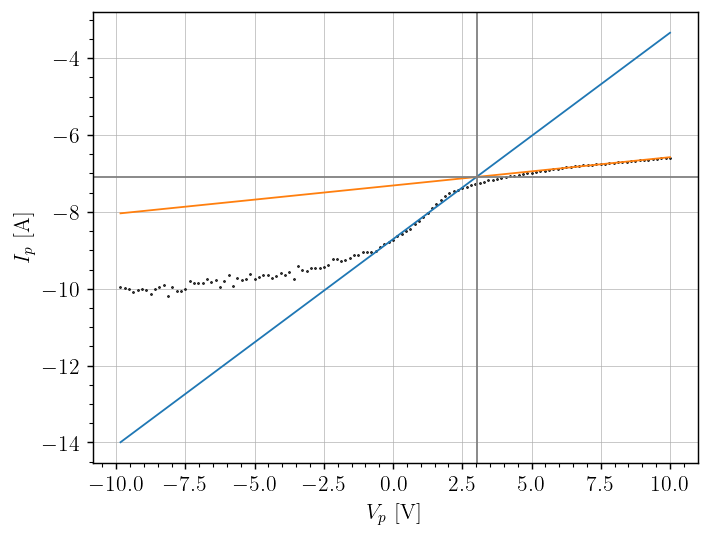

4.22+/-0.11 0.001402+/-0.000029
T_e_run = (2.68±0.05)×10⁴, T_run = (2.31±0.04)×10⁰, n_e_run = (1.09±0.02)×10¹⁶


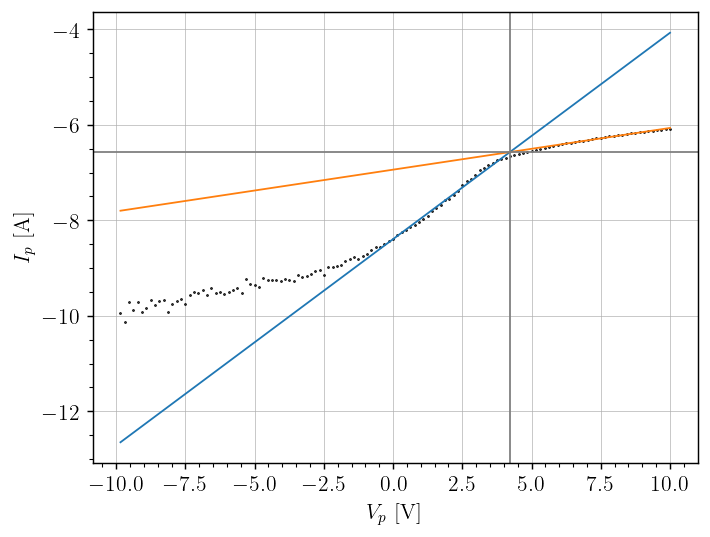

2.92+/-0.14 0.000575+/-0.000010
T_e_run = (2.10±0.08)×10⁴, T_run = (1.81±0.07)×10⁰, n_e_run = (5.07±0.09)×10¹⁵


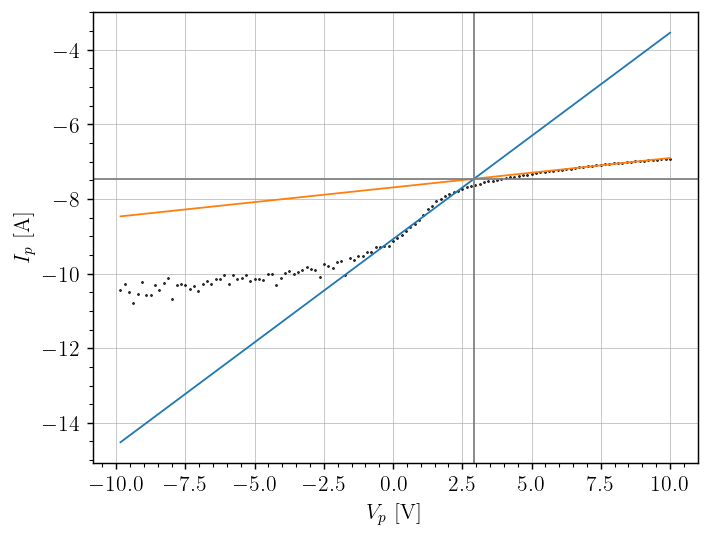

2.90+/-0.29 0.000613+/-0.000015
T_e_run = (2.3±0.2)×10⁴, T_run = (2.0±0.1)×10⁰, n_e_run = (5.2±0.1)×10¹⁵


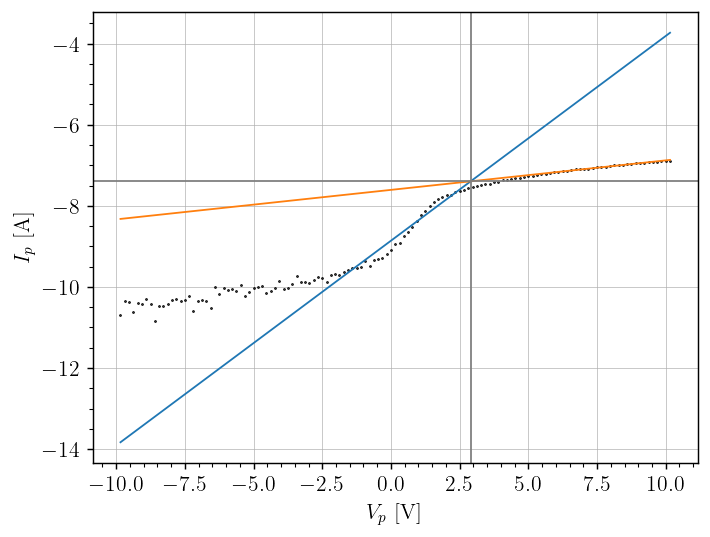

4.13+/-0.13 0.001353+/-0.000031
T_e_run = (2.64±0.06)×10⁴, T_run = (2.28±0.05)×10⁰, n_e_run = (1.06±0.02)×10¹⁶


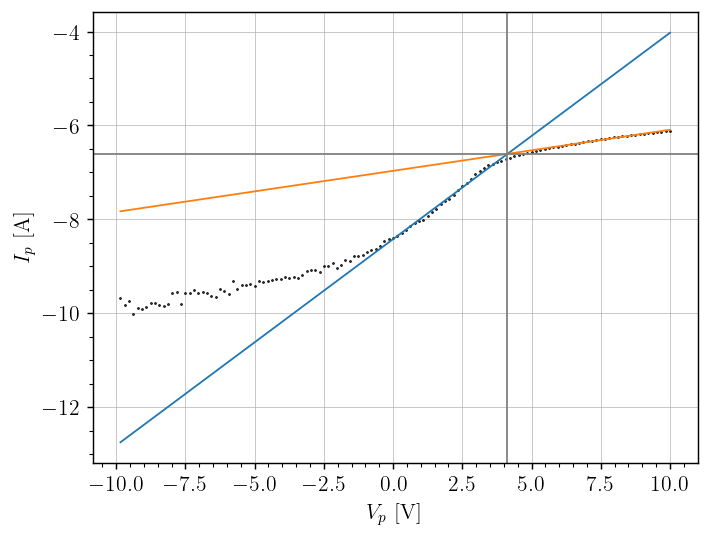

2.91+/-0.22 0.000558+/-0.000013
T_e_run = (2.1±0.1)×10⁴, T_run = (1.8±0.1)×10⁰, n_e_run = (4.9±0.1)×10¹⁵


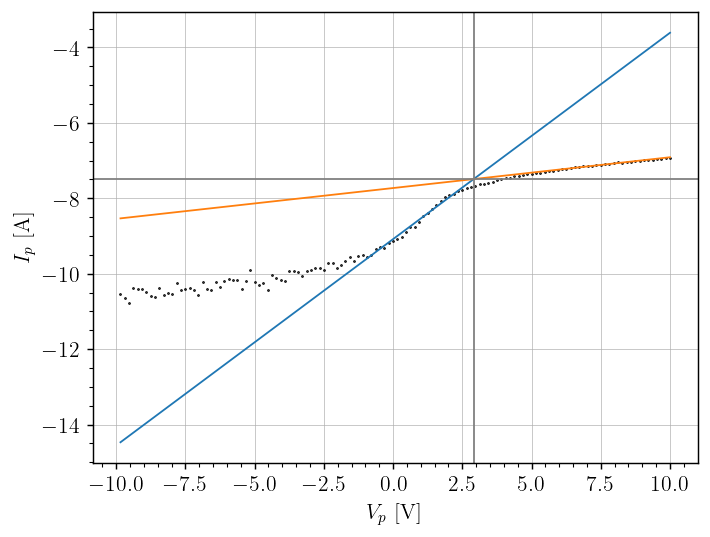

In [7]:
T_e = unp.uarray(np.zeros(len(datas)), np.zeros(len(datas)))
T = unp.uarray(np.zeros(len(datas)), np.zeros(len(datas)))
n_e = unp.uarray(np.zeros(len(datas)), np.zeros(len(datas)))

B_fit_stop = np.ones(len(datas))*3
C_fit_start = np.ones(len(datas))*5

for i, (header, data) in enumerate(zip(headers, datas)):
    p, d, G, A, f, I_chauffage, V_polarisation, *V_grill = header
    V_in, I_out, I_out_std = data

    dydx = np.gradient(np.nan_to_num(np.log(I_out), nan=1), V_in)
    threshold = 7e-2
    idx = np.abs(np.diff(dydx, prepend=0)) < threshold
    idx = np.logical_and(idx, V_in > -0.5)
    idx_B = set_all_between(np.logical_and(idx, V_in < B_fit_stop[i]))
    idx_C = set_all_between(np.logical_and(idx, V_in > C_fit_start[i]))
    # idx_B = np.logical_and(0 < V_in, V_in < 3)
    # idx_C = V_in > 6

    coefsB, covB = np.polyfit(V_in[idx_B], np.log(I_out[idx_B]), 1, cov=True)
    coefs_errB = unp.uarray(coefsB, np.sqrt(np.diag(covB)))
    fitfuncB = np.poly1d(coefsB)
    coefsC, covC = np.polyfit(V_in[idx_C], np.log(I_out[idx_C]), 1, cov=True)
    coefs_errC = unp.uarray(coefsC, np.sqrt(np.diag(covC)))
    fitfuncC = np.poly1d(coefsC)

    x = np.linspace(V_in[0], V_in[-1])
    plt.scatter(V_in, np.log(I_out), c='k', label=f"$I_c = {header[5]}")
    plt.plot(x, fitfuncB(x))
    plt.plot(x, fitfuncC(x))

    V_sp = -(coefs_errC[1] - coefs_errB[1]) / (coefs_errC[0] - coefs_errB[0])
    I_sp = umath.exp(coefs_errB[0] * V_sp + coefs_errB[1])
    print(V_sp, I_sp)
    plt.axvline(V_sp.n)
    plt.axhline(umath.log(I_sp).n)

    T_e_run = 1/coefs_errB[0] * ELEMENTARY_CHARGE / BOLTZMANN_CONSTANT_JOULE
    T_run = T_e_run * BOLTZMANN_CONSTANT_ELECTRONVOLT
    # TODO: verifier unitées
    n_e_run = 4 / (ELEMENTARY_CHARGE * SURFACE_PROBE) * unp.sqrt(2 * np.pi * ELECTRON_MASS / (BOLTZMANN_CONSTANT_JOULE * T_e_run)) * I_sp
    print(f"{T_e_run = :.1ueP}, {T_run = :.1ueP}, {n_e_run = :.1ueP}")
    T_e[i] = T_e_run
    T[i] = T_run
    n_e[i] = n_e_run

    # plt.gcf().delaxes(plt.gca())
    plt.xlabel("$V_p$ [V]")
    plt.ylabel("$I_p$ [A]")
    # plt.legend()
    plt.show()

In [8]:
voltages = list(map(lambda header: header[-1], headers))

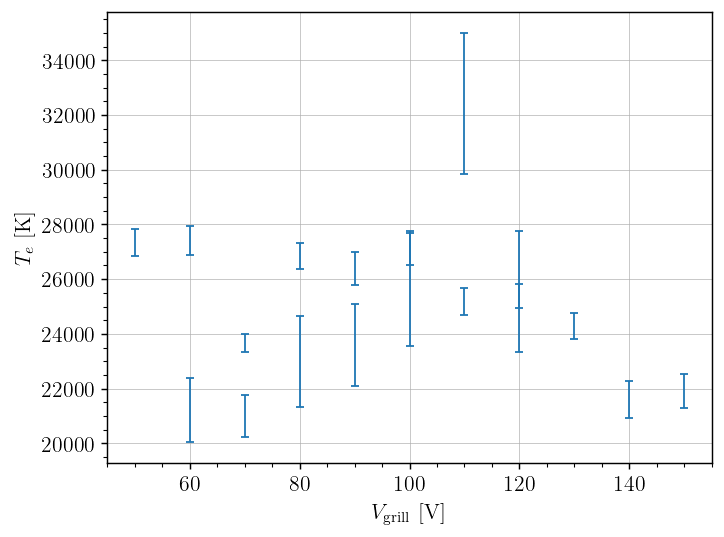

In [ ]:
plt.errorbar(voltages, nom_vals(T_e), yerr=std_devs(T_e), ls='')
plt.xlabel(r'$V_{\mathrm{grill}}$ [V]')
plt.ylabel(r'$T_e$ [K]')
plt.savefig("../figures/temperatureK_grill_polarisation.png")

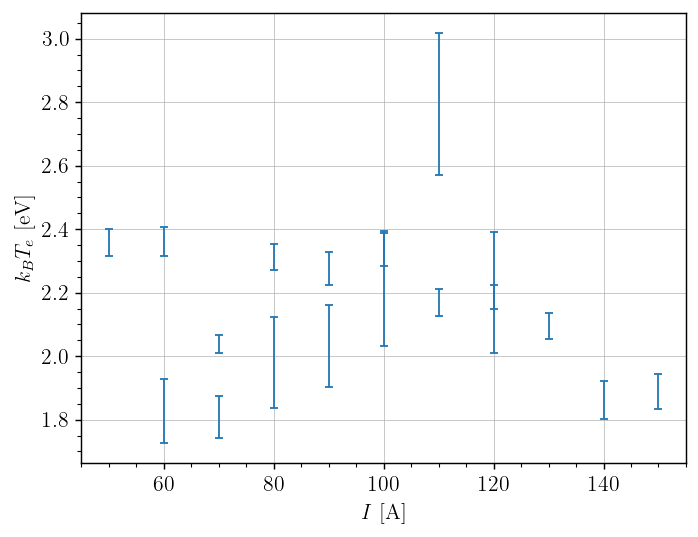

In [ ]:
plt.errorbar(voltages, nom_vals(T), yerr=std_devs(T), ls='')
plt.xlabel(r'$V_{\mathrm{grill}}$ [V]')
plt.ylabel(r'$k_B T_e$ [eV]')
plt.savefig("../figures/temperatureeV_grill_polarisation.png")

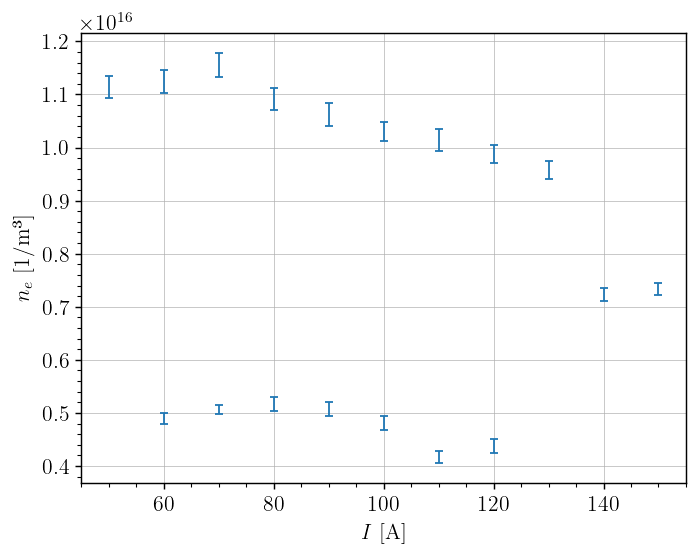

In [ ]:
plt.errorbar(voltages, nom_vals(n_e), yerr=std_devs(n_e), ls='')
plt.xlabel(r'$V_{\mathrm{grill}}$ [V]')
plt.ylabel(r'$n_e$ [1/m³]')
plt.savefig("../figures/density_grill_polarisation.png")

## Welp, we tried